# 网格搜索

In [1]:
import numpy as np
from sklearn import datasets

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
digite = datasets.load_digits()
X = digite.data
y = digite.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_text, y_train, y_text = train_test_split(X, y, test_size=0.2, random_state=666)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

sk_knn_clf = KNeighborsClassifier(n_neighbors=4, weights="uniform")
sk_knn_clf.fit(X_train, y_train)
sk_knn_clf.score(X_text, y_text)

0.9916666666666667

## 1.Grid Search

In [5]:
# 定义参数
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1, 11)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1, 11)],
        'p':[i for i in range(1, 6)]  # 明可夫斯距离
    }
]

In [6]:
# 创建机器学习算法
knn_clf = KNeighborsClassifier()

In [8]:
# 网格搜索
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf, param_grid)

In [10]:
%%time
# 进行算法

grid_search.fit(X_train, y_train)

CPU times: user 2min 34s, sys: 1.36 ms, total: 2min 34s
Wall time: 2min 34s


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}])

In [11]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [12]:
grid_search.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [13]:
grid_search.best_score_

0.9860820751064653

In [15]:
grid_search.best_index_

0

In [16]:
print(grid_search.best_estimator_)

KNeighborsClassifier(n_neighbors=1)


In [17]:
grid_search.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [20]:
knn_clf = grid_search.best_estimator_

In [21]:
knn_clf.predict(X_text)

array([8, 1, 3, 4, 4, 0, 7, 0, 8, 0, 4, 6, 1, 1, 2, 0, 1, 6, 7, 3, 3, 6,
       3, 2, 9, 4, 0, 2, 0, 3, 0, 8, 7, 2, 3, 5, 1, 3, 1, 5, 8, 6, 2, 6,
       3, 1, 3, 0, 0, 4, 9, 9, 2, 8, 7, 0, 5, 4, 0, 9, 5, 5, 9, 3, 4, 2,
       8, 8, 7, 1, 4, 3, 0, 2, 7, 2, 1, 2, 4, 0, 9, 0, 6, 6, 2, 0, 0, 5,
       4, 4, 3, 1, 3, 8, 6, 4, 4, 7, 5, 6, 8, 4, 8, 4, 6, 9, 7, 7, 0, 8,
       8, 3, 9, 7, 1, 8, 4, 2, 7, 0, 0, 4, 9, 6, 7, 3, 4, 6, 4, 8, 4, 7,
       2, 6, 5, 5, 8, 7, 2, 5, 5, 9, 7, 9, 3, 1, 9, 4, 4, 1, 5, 1, 6, 4,
       4, 8, 1, 6, 2, 5, 2, 1, 4, 4, 3, 9, 4, 0, 6, 0, 8, 3, 8, 7, 3, 0,
       3, 0, 5, 9, 2, 7, 1, 8, 1, 4, 3, 3, 7, 8, 2, 7, 2, 2, 8, 0, 5, 7,
       6, 7, 3, 4, 7, 1, 7, 0, 9, 2, 8, 9, 3, 8, 9, 1, 1, 1, 9, 8, 8, 0,
       3, 7, 3, 3, 4, 8, 2, 1, 8, 6, 0, 1, 7, 7, 5, 8, 3, 8, 7, 6, 8, 4,
       2, 6, 2, 3, 7, 4, 9, 3, 5, 0, 6, 3, 8, 3, 3, 1, 4, 5, 3, 2, 5, 6,
       8, 6, 9, 5, 5, 3, 6, 5, 9, 3, 7, 7, 0, 2, 4, 9, 9, 9, 2, 5, 6, 1,
       9, 6, 9, 7, 7, 4, 5, 0, 0, 5, 3, 8, 4, 4, 3,

In [22]:
knn_clf.score(X_text, y_text)

0.9833333333333333

In [23]:
%%time
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=2)

CPU times: user 51 µs, sys: 0 ns, total: 51 µs
Wall time: 55.6 µs


In [24]:
%%time
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:   50.6s


CPU times: user 527 ms, sys: 71.5 ms, total: 598 ms
Wall time: 1min 27s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=2)

In [25]:
%%time
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=2, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  95 tasks      | elapsed:   13.9s
[Parallel(n_jobs=2)]: Done 216 tasks      | elapsed:   53.4s


CPU times: user 482 ms, sys: 58.4 ms, total: 541 ms
Wall time: 1min 26s


[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:  1.4min finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1), n_jobs=2,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=2)

### 更多的距离
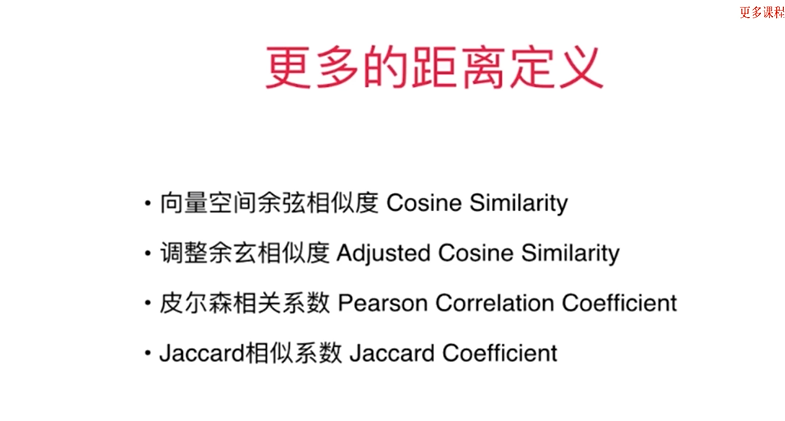